In [1]:
# Importing parent folder
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path: sys.path.append(nb_dir)

In [2]:
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
from scripts import skincolor_preparation as skinprep

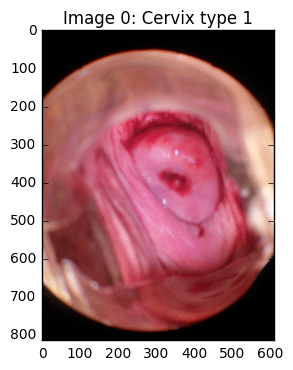

In [3]:
image_path = "../datasets/train/Type_1/0.jpg"
imagehq = Image.open(image_path)
imagelq = imagehq.resize((imagehq.size[0] >> 2, imagehq.size[1] >> 2))
# Viewing of the image
plt.title("Image 0: Cervix type 1")
plt.imshow(imagelq)
plt.show()

In [4]:
from keras.models import load_model
print("Loading CNN...")
if not 'skinmodel' in vars() or not 'skinmodel' in globals():
    skinmodelpath = "../pretrained/skincolor.h5"
    skinmodel = load_model(skinmodelpath)
    skinmodel.summary()
else:
    print("Model is already loaded!")
    skinmodel.summary()

Using TensorFlow backend.


Loading CNN...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 62, 62, 8)     224         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 31, 31, 8)     0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 29, 29, 16)    1168        maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 14, 14, 16)    0           convolution2d_2[0][0]            
____________________________________________________________________________

In [5]:
print("Generating heatmap...")
%time heatmap = skinprep.generate_skin_heatmap(skinmodel, imagehq)

Generating heatmap...
Generating batch...
Batch shape: (1938, 64, 64, 3)
Generating heatmap...
Heatmap shape: (51, 38)
CPU times: user 5.08 s, sys: 566 ms, total: 5.65 s
Wall time: 2.34 s


In [6]:
%time extracted, labeled, thresholded = skinprep.extract_image_from_heatmap(imagehq, heatmap, 0.8)
rescaled = scipy.misc.imresize(extracted, (512, 512), 'bicubic')

Finding extraction area...
Number of blobs found: 1
Biggest blob size: 484 (id: 1)
Heatmap rectangle:  [14, 47, 6, 33]
Scaled rectangle:  [901, 3027, 384, 2112]
CPU times: user 32.5 ms, sys: 24.3 ms, total: 56.9 ms
Wall time: 56.8 ms


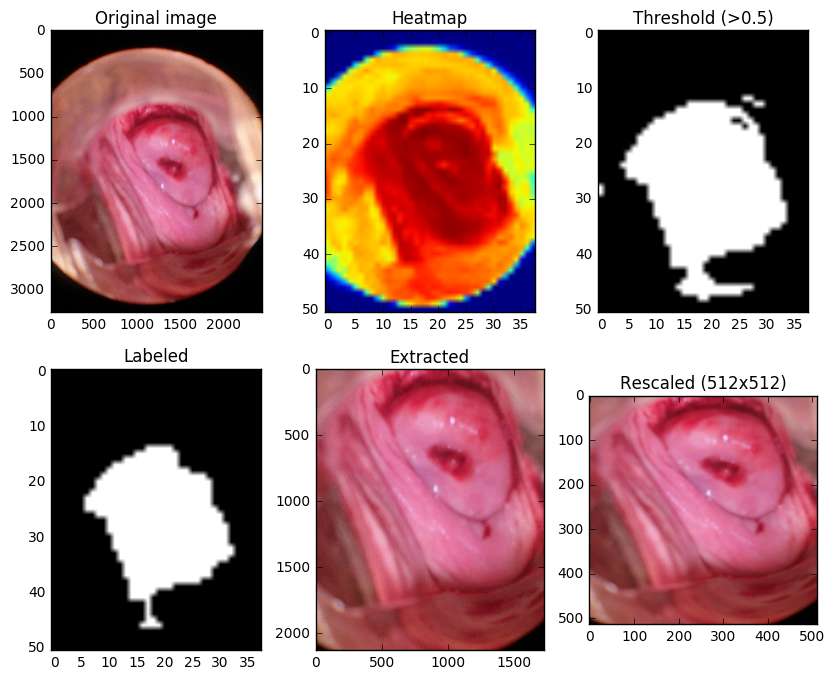

In [7]:
f, axarr = plt.subplots(2, 3, figsize=(10,8))
axarr[0, 0].set_title("Original image")
axarr[0, 0].imshow(imagehq)
axarr[0, 1].set_title("Heatmap")
axarr[0, 1].imshow(heatmap)
axarr[0, 2].set_title("Threshold (>0.5)")
axarr[0, 2].imshow(thresholded, cmap="gray")
axarr[1, 0].set_title("Labeled")
axarr[1, 0].imshow(labeled, cmap="gray")
axarr[1, 1].set_title("Extracted")
axarr[1, 1].imshow(extracted)
axarr[1, 2].set_title("Rescaled (512x512)")
axarr[1, 2].imshow(rescaled)

plt.show()